# Initial Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('Datasets/breach_report.csv')
df

In [ ]:
df.shape

(722, 6)

In [ ]:
df.nunique()

State                                49
Covered Entity Type                   4
Individuals Affected                644
Type of Breach                        5
Location of Breached Information     34
Business Associate Present            2
dtype: int64

In [ ]:
df.isnull().sum()

State                               2
Covered Entity Type                 0
Individuals Affected                0
Type of Breach                      0
Location of Breached Information    0
Business Associate Present          0
dtype: int64

In [ ]:
# Dropping nan elements from state column
df.dropna(subset = ['State'], inplace = True)
df.isnull().sum()

State                               0
Covered Entity Type                 0
Individuals Affected                0
Type of Breach                      0
Location of Breached Information    0
Business Associate Present          0
dtype: int64

In [ ]:
df.dtypes

State                               object
Covered Entity Type                 object
Individuals Affected                 int64
Type of Breach                      object
Location of Breached Information    object
Business Associate Present          object
dtype: object

# Univariate Analysis
- **Analyzing each individual feature separately looking for unique characteristics that can be investigated deeper during bivariate anlysis**

In [ ]:
# Separating categorical and continous features
cat=[i for i in df.columns if df[i].nunique()<50]
cont=[i for i in df.columns if df[i].nunique()>50]

In [ ]:
plt.figure(figsize=(35,16))
plt.subplot(1,2,1)
df['State'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='State', data=df)
df['State'].value_counts()

NY    65
TX    59
CA    55
FL    42
PA    35
OH    32
MI    24
IL    23
MA    23
GA    22
MN    22
MO    20
CT    18
MD    18
NC    18
IN    18
VA    17
CO    16
NJ    16
WI    14
AR    14
TN    13
IA    12
AZ    11
KY    10
WA    10
LA     9
UT     9
DE     8
NM     8
SC     7
NE     6
OR     6
ME     5
NV     4
OK     4
KS     3
AK     3
ID     3
AL     3
WV     3
DC     2
NH     2
ND     2
WY     2
MT     1
MS     1
HI     1
VT     1
Name: State, dtype: int64

Healthcare Provider          571
Business Associate            81
Health Plan                   67
Healthcare Clearing House      1
Name: Covered Entity Type, dtype: int64

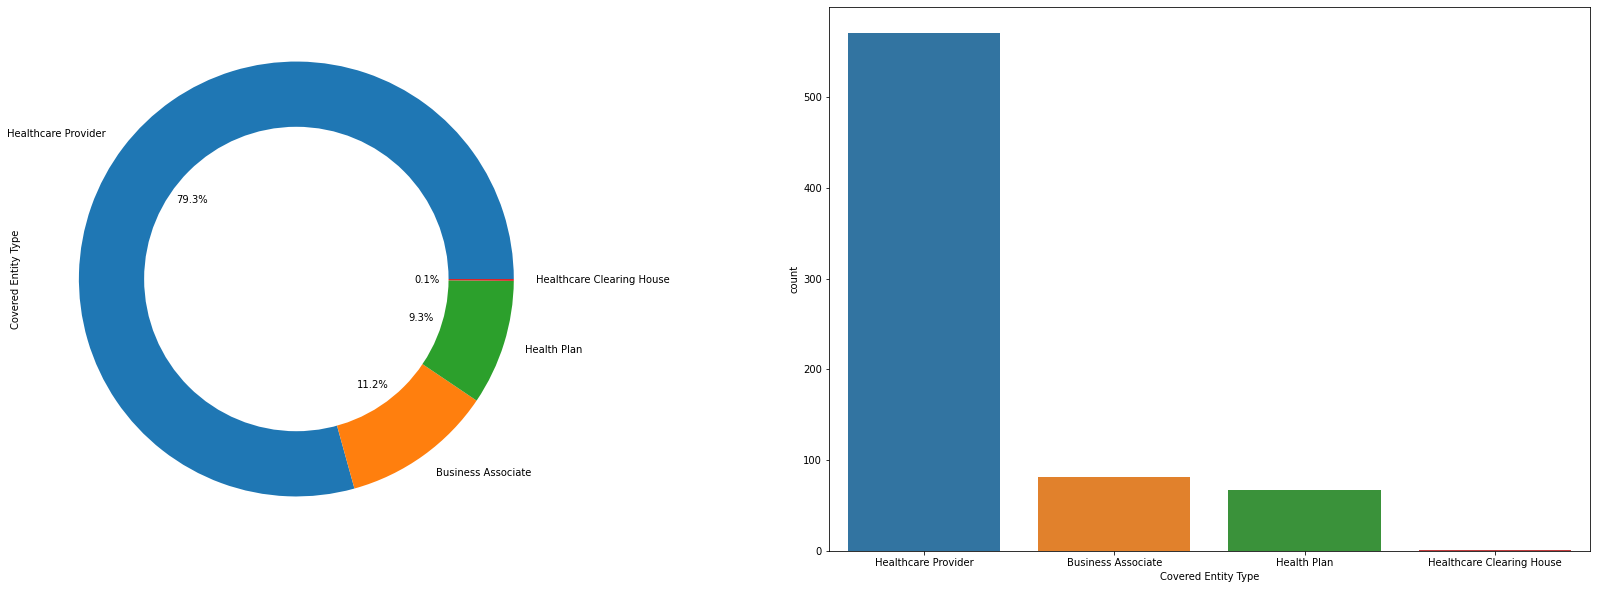

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
df['Covered Entity Type'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Covered Entity Type', data=df)
df['Covered Entity Type'].value_counts()

Hacking/IT Incident               521
Unauthorized Access/Disclosure    140
Theft                              33
Loss                               14
Improper Disposal                  12
Name: Type of Breach, dtype: int64

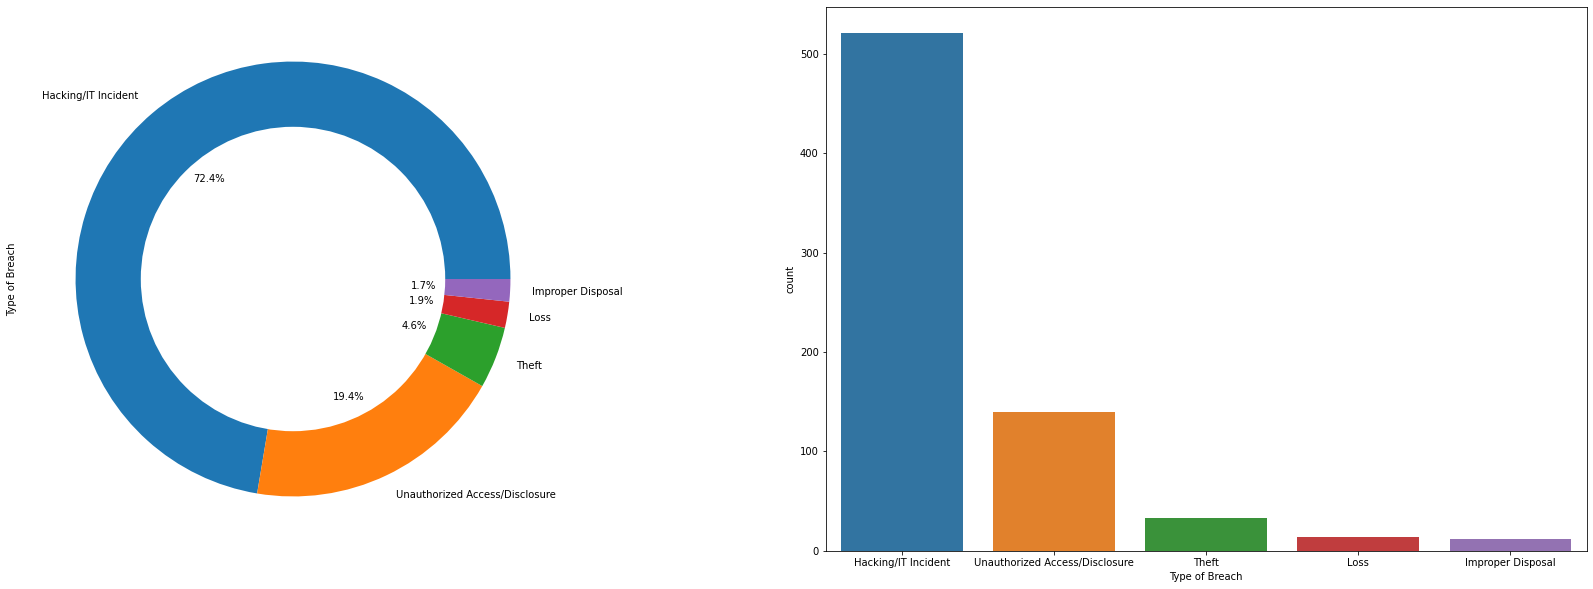

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
df['Type of Breach'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Type of Breach', data=df)
df['Type of Breach'].value_counts()

Email                                                                         276
Network Server                                                                236
Paper/Films                                                                    57
Electronic Medical Record                                                      28
Other                                                                          28
Network Server, Other                                                          16
Laptop                                                                         11
Desktop Computer                                                                9
Other Portable Electronic Device                                                9
Email, Network Server                                                           8
Electronic Medical Record, Network Server                                       7
Desktop Computer, Network Server                                                6
Other Portable E

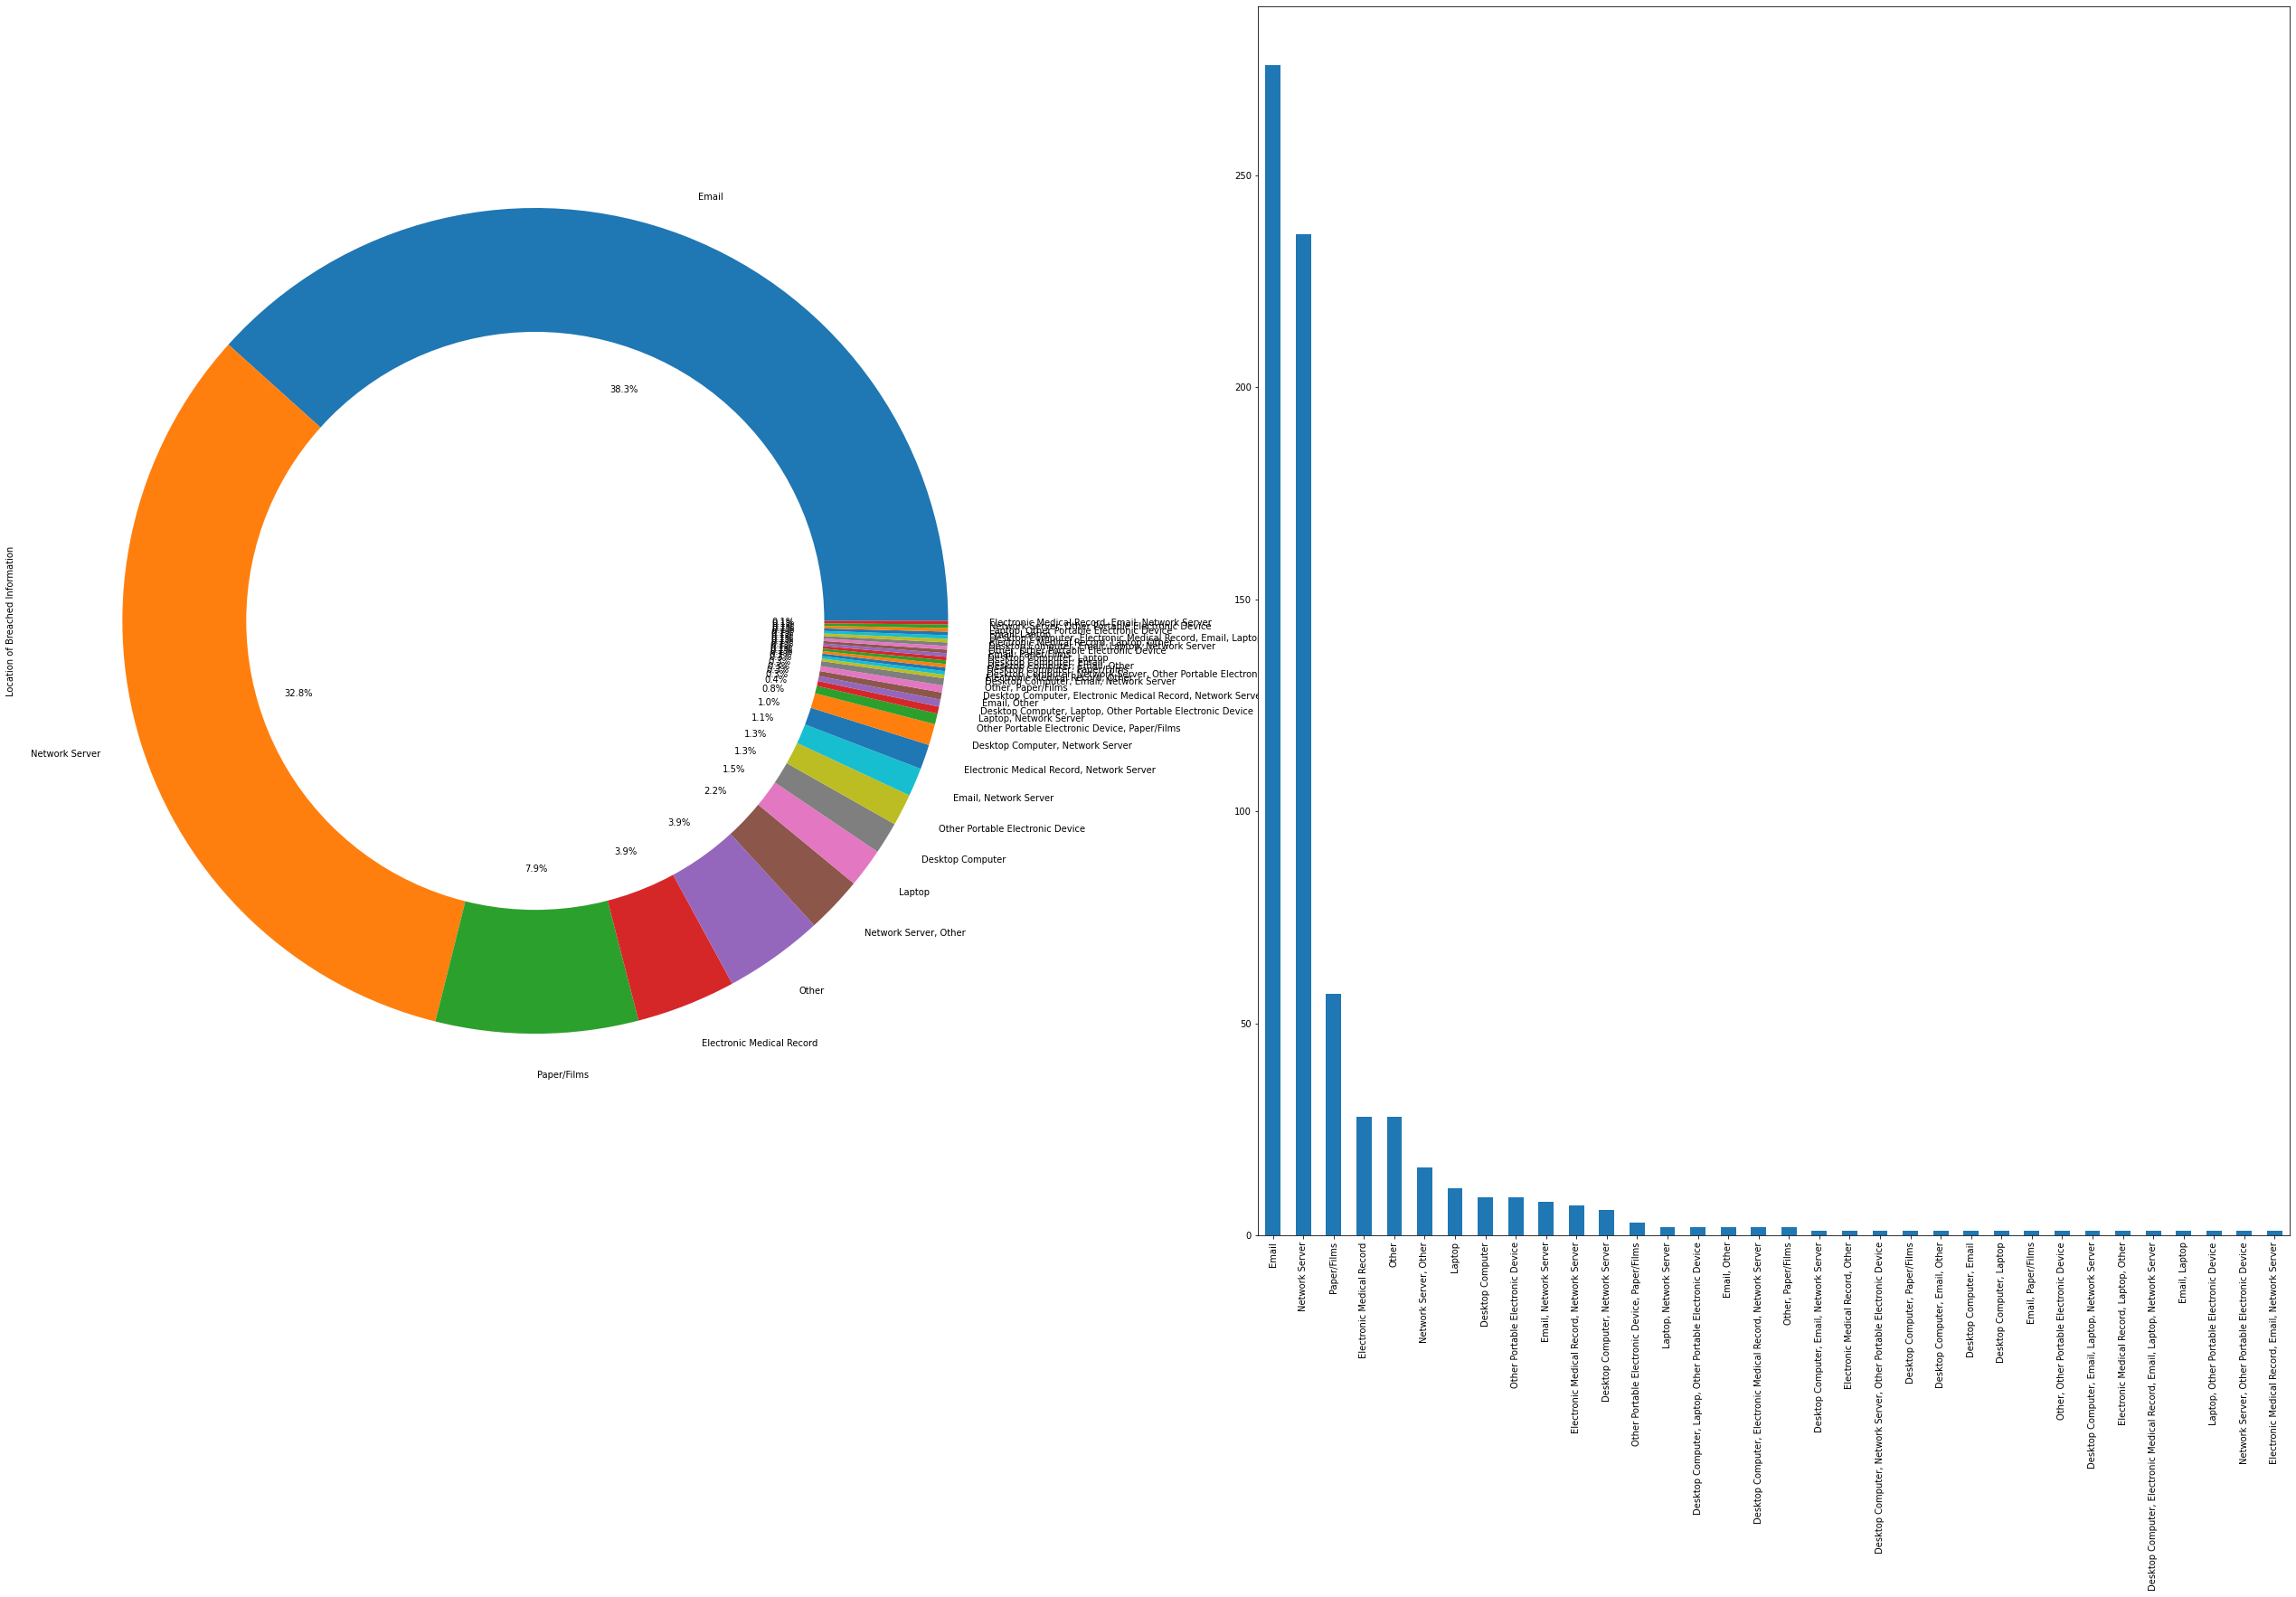

In [ ]:
plt.figure(figsize=(45,25))
plt.subplot(1,2,1)
df['Location of Breached Information'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
df['Location of Breached Information'].value_counts().plot.bar()
df['Location of Breached Information'].value_counts()

No     496
Yes    224
Name: Business Associate Present, dtype: int64

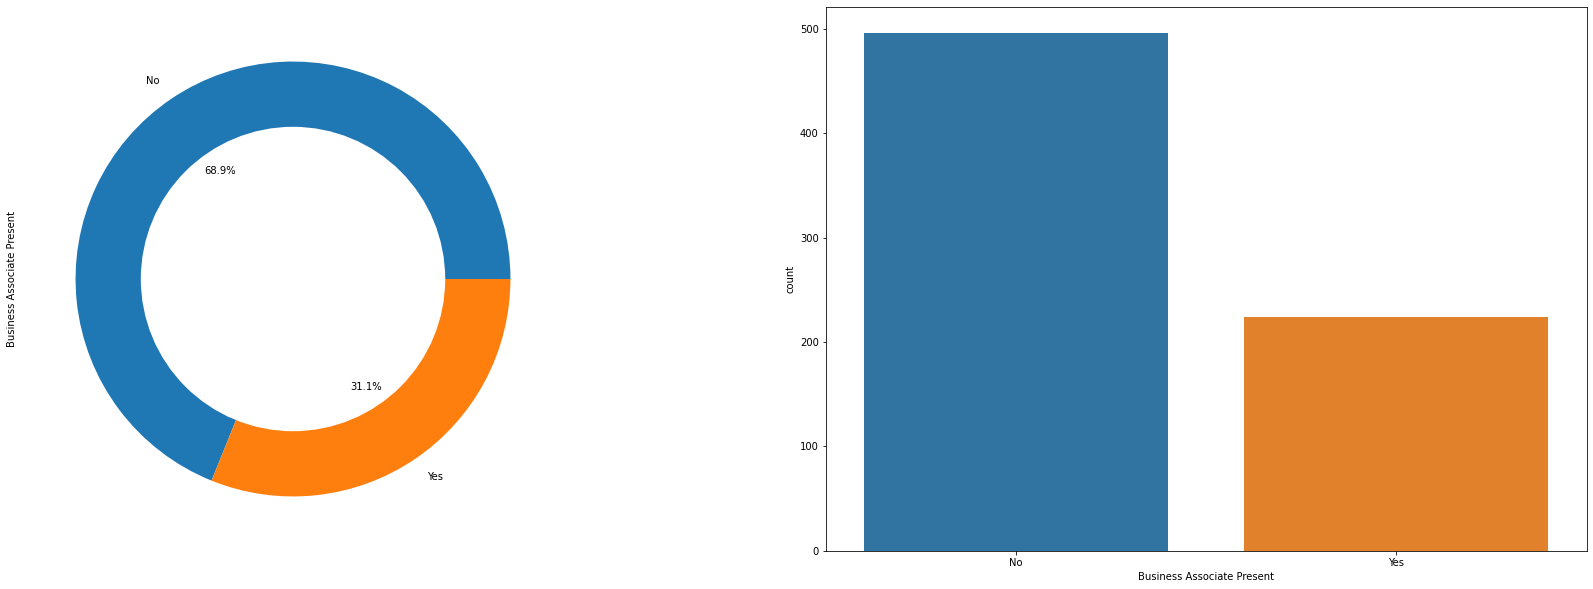

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
df['Business Associate Present'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Business Associate Present', data=df)
df['Business Associate Present'].value_counts()

- Notes: It seems to be that the data is telling me how vulnerable these companies are to cyber threats. There is defintely a possibly for something new to come forth in the coming days

<AxesSubplot:xlabel='Type of Breach', ylabel='count'>

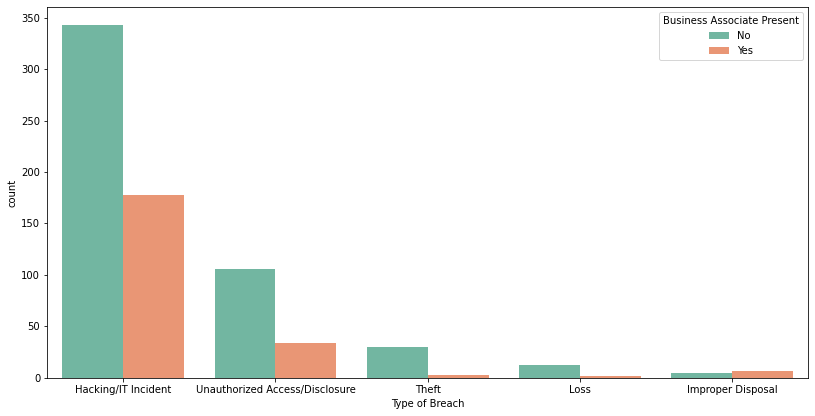

In [ ]:
# Business Associate Present vs Type of Breach
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
sns.countplot(df['Type of Breach'], hue=df['Business Associate Present'],palette='Set2')

<AxesSubplot:xlabel='Location of Breached Information', ylabel='count'>

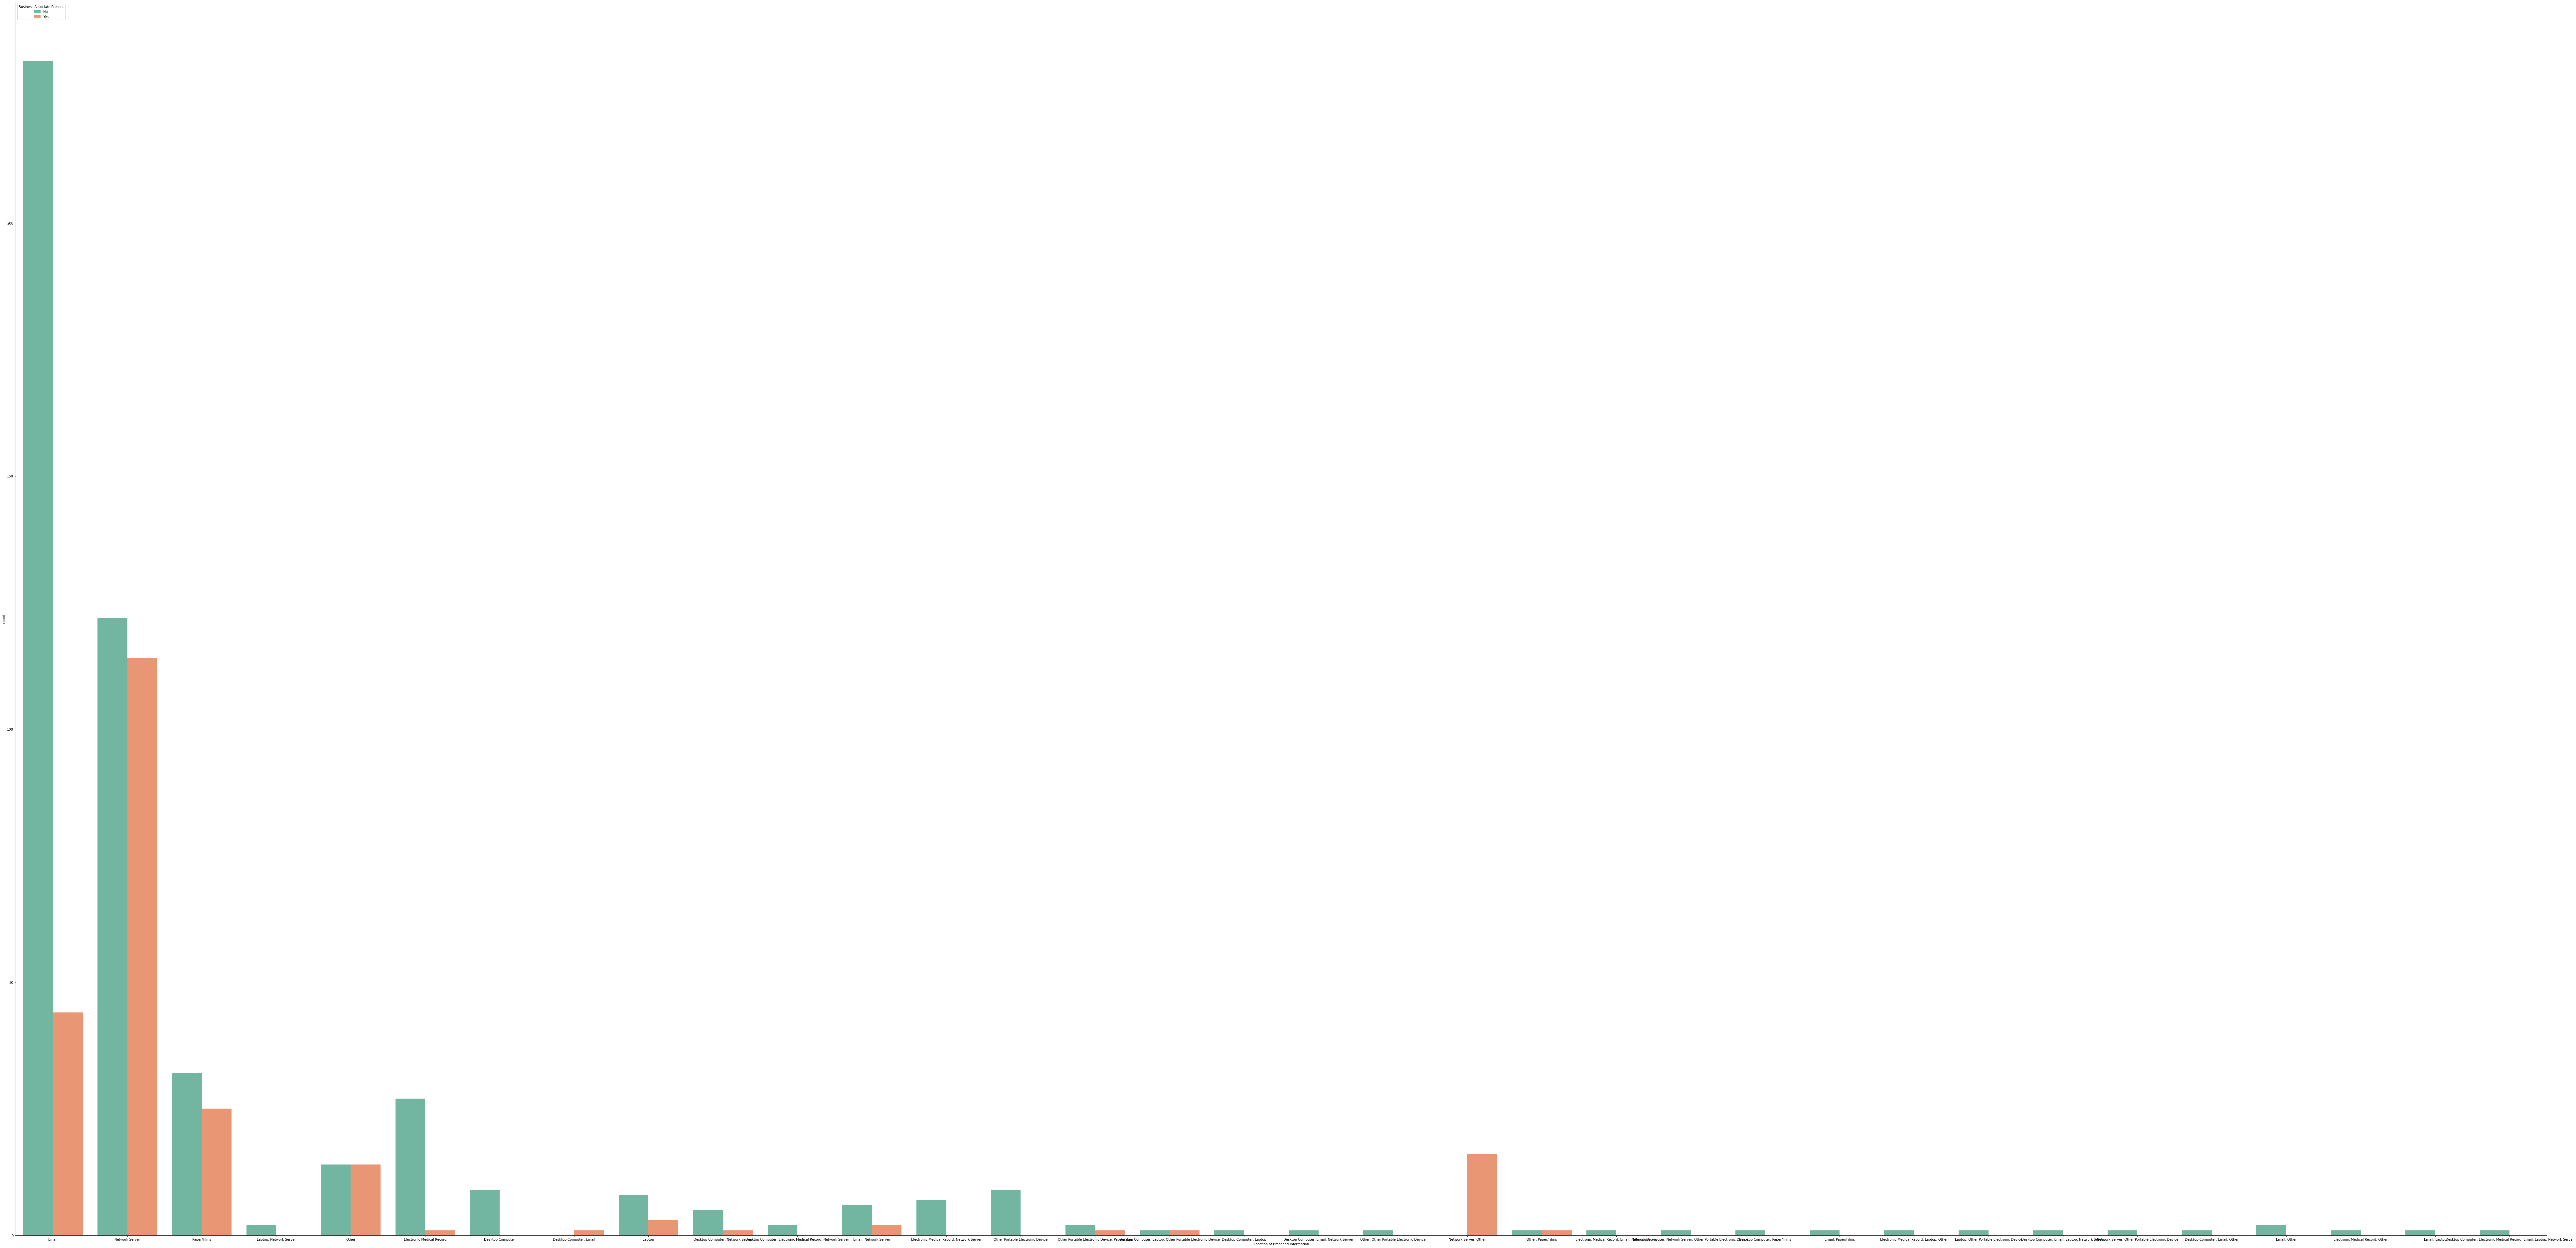

In [ ]:
# Business Associate Present vs other features
plt.figure(figsize=(300,150))
plt.subplot(2,2,1)
sns.countplot(df['Location of Breached Information'], hue=df['Business Associate Present'],palette='Set2')

In [ ]:
plt.figure(figsize=(100, 35))
sns.stripplot(x='Type of Breach', y='Location of Breached Information', hue='Business Associate Present', jitter=0.25, data=df, dodge=True)